# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [5]:
# Install TensorFlow
!pip install tensorflow

# Install Keras (usually comes with TensorFlow)
!pip install keras

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Print the versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


2023-10-11 15:42:59.003002: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 15:42:59.067850: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-11 15:42:59.067910: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-11 15:42:59.067959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-11 15:42:59.078697: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 15:42:59.079901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

TensorFlow version: 2.14.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

# Q2. Load the Wine Quality dataset and explore its dimensions.
- Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [6]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
data = pd.read_csv('wine.csv')
print(data.head())
print(data.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3 

# Q3. Check for null values, identify categorical variables, and encode them.

In [8]:
# Check for null values in the dataset
null_values = data.isnull().sum()
print("Null Values:\n", null_values)

# Identify categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Variables:\n", categorical_columns)

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)


Null Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical Variables:
 Index(['quality'], dtype='object')


# Q4. Separate the features and target variables from the dataframe.

In [9]:
# Assuming 'target_column_name' is the name of the column you want to predict
target_column_name = 'alcohol'

# Separate features (X) and target (y)
X = data_encoded.drop(target_column_name, axis=1)
y = data_encoded[target_column_name]


# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [11]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = data_encoded.drop('alcohol', axis=1)
y = data_encoded['alcohol']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the dimensions of the resulting sets
print("Training set: X_train shape =", X_train.shape, "y_train shape =", y_train.shape)
print("Validation set: X_val shape =", X_val.shape, "y_val shape =", y_val.shape)
print("Test set: X_test shape =", X_test.shape, "y_test shape =", y_test.shape)


Training set: X_train shape = (1119, 12) y_train shape = (1119,)
Validation set: X_val shape = (240, 12) y_val shape = (240,)
Test set: X_test shape = (240, 12) y_test shape = (240,)


# Q6. Perform scaling on the dataset.

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [13]:
from tensorflow import keras

# Create a Sequential model
model = keras.Sequential()

# Add the input layer (input_shape should match the number of features)
model.add(keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))

# Add at least 2 hidden layers with a specified number of neurons and activation functions
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))

# Add the output layer with 1 neuron and a sigmoid activation function for binary classification
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to your training data
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))


Epoch 1/10
35/35 [==============================] - 1s 9ms/step - loss: -18.8487 - accuracy: 0.0000e+00 - val_loss: -38.2490 - val_accuracy: 0.0000e+00
Epoch 2/10
35/35 [==============================] - 0s 3ms/step - loss: -68.3772 - accuracy: 0.0000e+00 - val_loss: -112.6144 - val_accuracy: 0.0000e+00
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: -179.2939 - accuracy: 0.0000e+00 - val_loss: -274.1141 - val_accuracy: 0.0000e+00
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: -404.2016 - accuracy: 0.0000e+00 - val_loss: -584.6226 - val_accuracy: 0.0000e+00
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: -807.8618 - accuracy: 0.0000e+00 - val_loss: -1109.1135 - val_accuracy: 0.0000e+00
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: -1454.3756 - accuracy: 0.0000e+00 - val_loss: -1910.9291 - val_accuracy: 0.0000e+00
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: -240

# Q8. Create a Sequential model and add all the layers to it.

In [14]:
# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display a summary of the model's architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [15]:
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)


# Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an Early Stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback to save the best model
model_checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


# Q12. Print the model summary.

In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
# Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [22]:
# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpointcallbacks.

In [23]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Define callbacks
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

# Fit the model with callbacks
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), 
                    epochs=50, batch_size=32, 
                    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])


Epoch 1/50
35/35 [==============================] - 1s 13ms/step - loss: -9813.1416 - accuracy: 0.0000e+00 - val_loss: -10750.1338 - val_accuracy: 0.0000e+00
Epoch 2/50
22/35 [=================>............] - ETA: 0s - loss: -11034.8740 - accuracy: 0.0000e+00

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 0s 5ms/step - loss: -11411.7607 - accuracy: 0.0000e+00 - val_loss: -12494.1709 - val_accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: -13254.2051 - accuracy: 0.0000e+00 - val_loss: -14504.9941 - val_accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: -15364.4473 - accuracy: 0.0000e+00 - val_loss: -16827.9336 - val_accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: -17800.6699 - accuracy: 0.0000e+00 - val_loss: -19475.0527 - val_accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: -20584.1289 - accuracy: 0.0000e+00 - val_loss: -22507.8242 - val_accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: -23757.7891 - accuracy: 0.0000e+00 - val_loss: -25957.1504 - val_accuracy: 0.0000e+00
Epoch 8/50
35/35 [==============================] - 0s 5ms/step

# Q16. Get the model's parameters.

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q17. Store the model's training history as a Pandas DataFrame.

In [25]:
history_df = pd.DataFrame(history.history)


# Q18. Plot the model's training history.

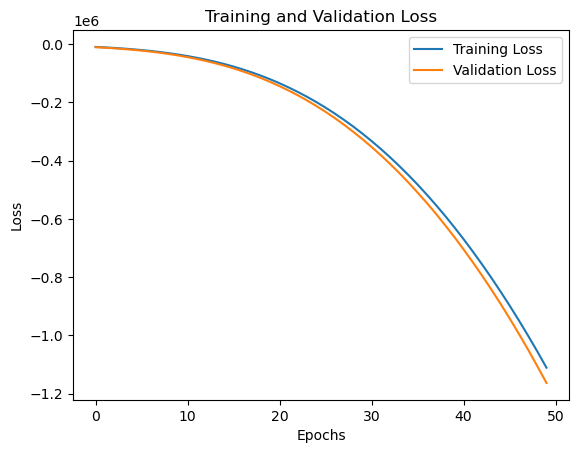

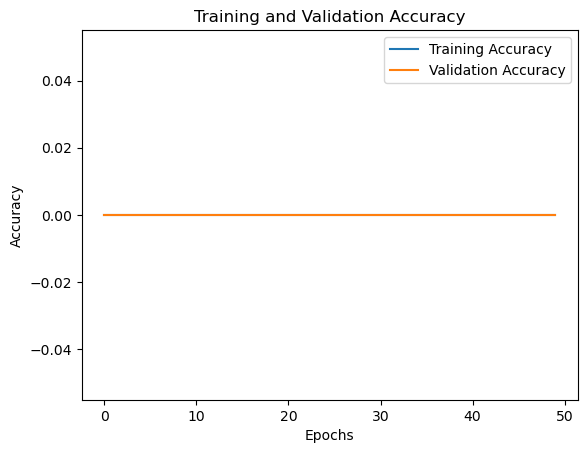

In [26]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


# Q19. Evaluate the model's performance using the test data.

In [27]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


8/8 [==============================] - 0s 2ms/step - loss: -1192614.0000 - accuracy: 0.0000e+00
Test Loss: -1192614.0
Test Accuracy: 0.0
